In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
dataset = pd.read_csv('house_data.csv')

In [32]:
dataset.insert(6,"x0",1)
print (dataset.head())


           id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 22 columns]


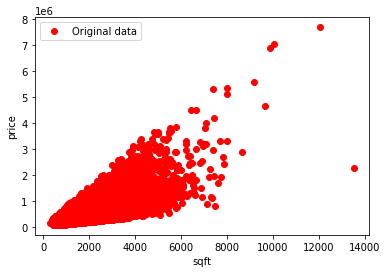

In [33]:
x_data = dataset.iloc[:,[5,6]]
y_data = dataset['price']
plt.plot(x_data.iloc[:,0], y_data, 'ro', label='Original data') 
plt.xlabel("sqft")
plt.ylabel("price")
plt.legend()
plt.show()

In [34]:
#scaling
x_max=x_data.iloc[:,0].max()
x_data.iloc[:,0]=x_data.iloc[:,0]/x_max
print(x_max)
print(x_data)

13540
       sqft_living  x0
0         0.087149   1
1         0.189808   1
2         0.056869   1
3         0.144756   1
4         0.124077   1
...            ...  ..
21608     0.112999   1
21609     0.170606   1
21610     0.075332   1
21611     0.118168   1
21612     0.075332   1

[21613 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [35]:
#convert to matrix
x_data=np.array(x_data)
y_data=np.array(y_data).flatten()
print(x_data.shape)
print(y_data.shape)

(21613, 2)
(21613,)


In [36]:
#split data train & test 80/20
trainSize=int(y_data.size*.8)
testSize=round(y_data.size*.2)
print(trainSize,testSize)
xTrain=x_data[:trainSize]
xTest=x_data[trainSize:]

yTrain=y_data[:trainSize]
yTest=y_data[trainSize:]

print(xTrain,xTest)
print(len(yTrain),len(yTest))

17290 4323
[[0.08714919 1.        ]
 [0.18980798 1.        ]
 [0.05686854 1.        ]
 ...
 [0.18759232 1.        ]
 [0.38035451 1.        ]
 [0.25258493 1.        ]] [[0.1676514  1.        ]
 [0.1676514  1.        ]
 [0.10856721 1.        ]
 ...
 [0.07533235 1.        ]
 [0.11816839 1.        ]
 [0.07533235 1.        ]]
17290 4323


In [37]:
alpha=.0001
ceta=np.array([0,0])
def gradientDescentOneVar():
    global ceta
    for i in range(100):
        y_pred = xTrain.dot(ceta) #loss
        ceta = ceta - (xTrain.T.dot(y_pred - yTrain)) * alpha * (1 / trainSize)
        ceta0,ceta1=ceta
        #print(MSE(ceta0,ceta1))
        print(ceta)

In [38]:
def MSE(ceta0,ceta1):
    Esum=0
    for i in range(trainSize):
        Esum+=pow( y_data[i] - (ceta0+ceta1*x_data[i]) , 2)
    Esum=Esum*(1/trainSize)
    return Esum

In [39]:
gradientDescentOneVar()

[ 9.80325269 53.32474934]
[ 19.60566951 106.64401749]
[ 29.40725053 159.95780501]
[ 39.20799586 213.26611246]
[ 49.00790556 266.5689404 ]
[ 58.80697973 319.86628939]
[ 68.60521846 373.15815999]
[ 78.40262182 426.44455276]
[ 88.1991899  479.72546827]
[ 97.9949228  533.00090707]
[107.78982058 586.27086973]
[117.58388335 639.53535679]
[127.37711118 692.79436884]
[137.16950416 746.04790641]
[146.96106238 799.29597008]
[156.75178592 852.53856041]
[166.54167486 905.77567795]
[176.3307293  959.00732326]
[ 186.11894931 1012.23349691]
[ 195.90633498 1065.45419945]
[ 205.6928864  1118.66943145]
[ 215.47860366 1171.87919346]
[ 225.26348683 1225.08348604]
[ 235.047536   1278.28230976]
[ 244.83075126 1331.47566517]
[ 254.6131327  1384.66355283]
[ 264.39468039 1437.8459733 ]
[ 274.17539443 1491.02292714]
[ 283.9552749  1544.19441491]
[ 293.73432188 1597.36043717]
[ 303.51253546 1650.52099448]
[ 313.28991573 1703.6760874 ]
[ 323.06646277 1756.82571648]
[ 332.84217666 1809.96988229]
[ 342.61705749 186